# Fifa Player Performance, Ranking and Salary Analysis

DS Project proposal by: <br>
Tsega Abebe (A0242543L) and Jakob Nunnendorf (A0242358A)

## About the data: <br>
Approach: <br>
For our project, we aim to perform exploratory data analysis (EDA) to tell a data-backed story about football. <br>
In the interest of accuracy we have chosen our dataset based on the following criteria: <br>
- High data quality
- Large data quantity
- Strong predictability
- Interesting context

We believe that the dataset FIFA World Cup Player Ratings from kaggle meets all of these criteria because the data originally stems from the EA Sports Fifa game series. EA Sports employs a combination of real-life data, professional scouting, and collaboration with clubs and players to obtain the data. For the purpose of this project we will take this to be the closest available representation of the real world.

We have 18,278 observations and 62 possibly relevant predictors.


# Research Question:
How do the various skill attributes, like dribbling, shooting, and passing, contribute to a player's overall rating in the FIFA World Cup Player Ratings dataset? Is there any skill attribute that stands out as a particularly strong indicator of overall rating?

To perform EDA and answer these research questions, we need to clearly understand the dataset's features, their distribution, and their correlation with the target variable.


# Importing Library

In [ ]:
# Run this cell to set up your notebook
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Data Set

In [ ]:
df = pd.read_csv("players_20.csv")
df.head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


# Exploratory Data Analysis (EDA)

### First we analyse the dataset

### What are the dimensions of the dataset i.e. how many rows and how many columns?

In [ ]:
print('Total Number of Rows: ',df.shape[0])
print('Total Number of Columns: ',df.shape[1])

Total Number of Rows:  18278
Total Number of Columns:  104


### What are the columns names and what might be interesting predictors?

In [ ]:
print('Out of the following columns:')
print(list(df.columns))
predictor_columns = ['height_cm', 'weight_kg', 'overall', 'player_positions', 'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']
print(f'There are {len(predictor_columns)} interesting predictors')


Out of the following columns:
['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance

### Number of missing values in each column

In [ ]:
df.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

### How many missing values for each predictor:

In [ ]:
missing_values = df[predictor_columns].isnull().sum().sort_values(ascending=False)
missing_values

gk_speed                      16242
gk_positioning                16242
gk_reflexes                   16242
gk_kicking                    16242
gk_handling                   16242
gk_diving                     16242
dribbling                      2036
defending                      2036
physic                         2036
passing                        2036
shooting                       2036
pace                           2036
mentality_composure               0
power_long_shots                  0
power_strength                    0
mentality_aggression              0
power_stamina                     0
mentality_interceptions           0
mentality_positioning             0
mentality_vision                  0
mentality_penalties               0
height_cm                         0
defending_marking                 0
defending_standing_tackle         0
defending_sliding_tackle          0
goalkeeping_diving                0
power_shot_power                  0
goalkeeping_handling        

It makes sense that non-goal keepers have no goal keeper values. It might be interesting to see how many values we have per position (goalie, defender, midfield, striker).

So first we see how many positions there are and sort them into the four categories.

In [ ]:
unique_positions = df['player_positions'].unique()
# create containers for all four categories
goal_keeper_positions = []
defender_positions = []
midfielder_positions = []
striker_positions = []
for position in unique_positions:
  if 'GK' in position:
    goal_keeper_positions.append(position)
  if 'B' in position:
    defender_positions.append(position)
  if position[-1] == 'M' or position[-1] == 'W':
    midfielder_positions.append(position)
  if 'ST' in position:
    striker_positions.append(position)
print("Total number of goalie's positions : {}".format(len(goal_keeper_positions)))
print("Total number of defender's positions: {}".format(len(defender_positions)))
print("Total number of midfielder's positions: {}".format(len(midfielder_positions)))
print("Total number of striker's positions: {}".format(len(striker_positions)))


Total number of goalie's positions : 1
Total number of defender's positions: 311
Total number of midfielder's positions: 387
Total number of striker's positions: 131


Find out how many data points we have per category:

In [ ]:
# Create a dictionary to store the count of players in each category
player_count = {
    'Goalie': 0,
    'Defender': 0,
    'Midfielder': 0,
    'Striker': 0,
    'Sum': 0,
    'Unique': 0,
    'Rows': 0
}

for index, row in df.iterrows():
    player_count['Rows'] += 1
    positions = row['player_positions']
    if positions in goal_keeper_positions:
        player_count['Goalie'] += 1
    if positions in defender_positions:
        player_count['Defender'] += 1
    if positions in midfielder_positions:
        player_count['Midfielder'] += 1
    if positions in striker_positions:
        player_count['Striker'] += 1
    if positions in unique_positions:
        player_count['Unique'] += 1
    player_count['Sum'] = player_count['Goalie'] + player_count['Defender'] + player_count['Midfielder'] + player_count['Striker']

# Print the counts of players in each category
for category, count in player_count.items():
    print(f"{category}: {count}")


Goalie: 2036
Defender: 6610
Midfielder: 8138
Striker: 3255
Sum: 20039
Unique: 18278
Rows: 18278


This makes sense, we have a total of 18278 players and the categories sum up to 20039. Some players for example play as both midfielder and striker. Because each categorie has different target characteristics, it will make sense to separate them accordingly.

### To address research question two we used the following visualizations. 

#### Average values of each skill attribute for players in different overall rating groups

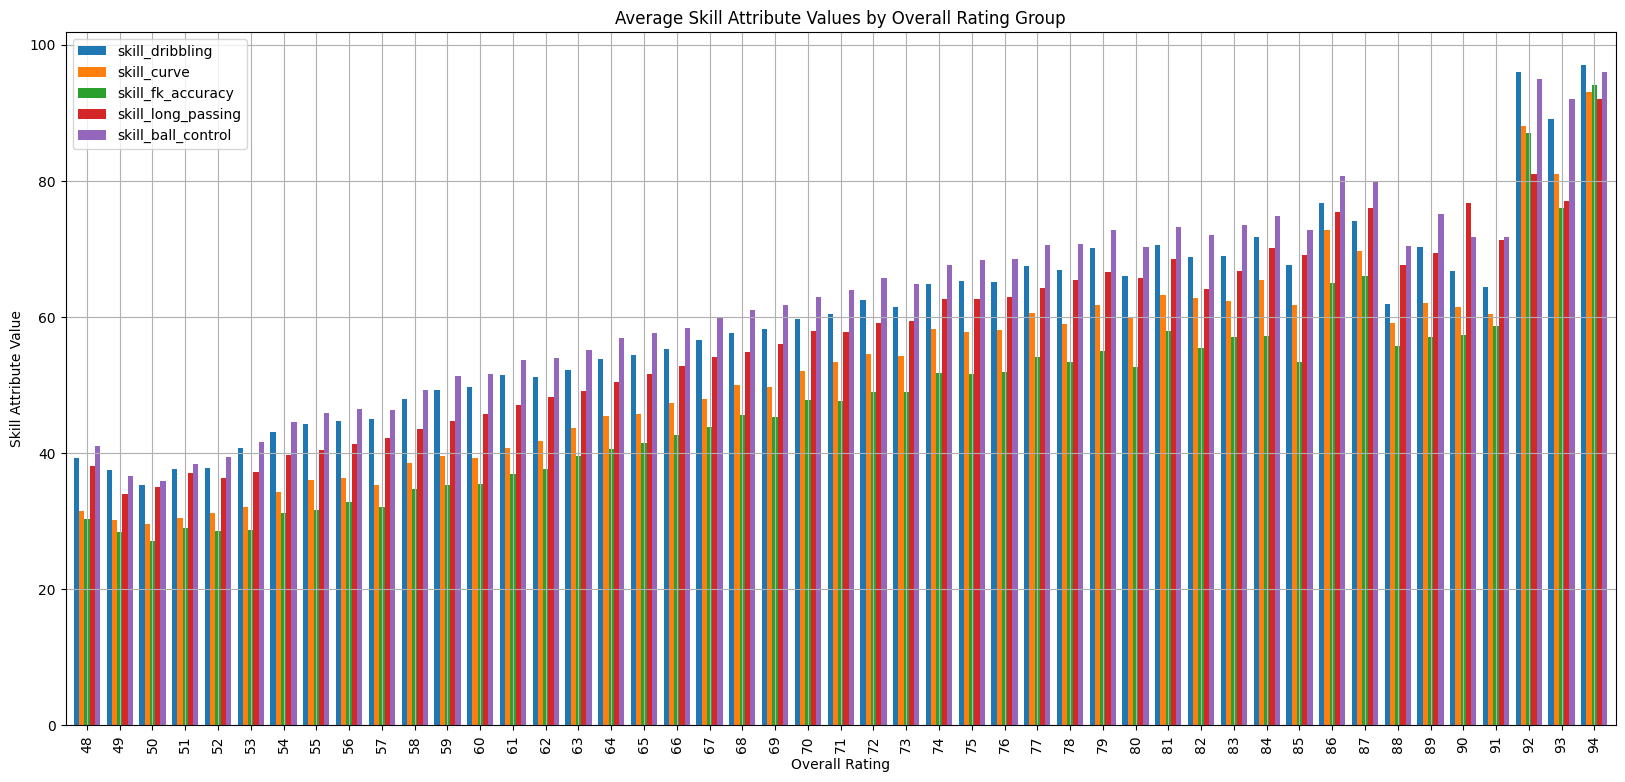

In [ ]:
# Group the data by overall rating and calculate the average values for each skill attribute
grouped = df.groupby('overall')[['skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control']].mean()
ax = grouped.plot(kind='bar', figsize=(20, 9), width=0.8 ,grid=True)
ax.set_title('Average Skill Attribute Values by Overall Rating Group')
ax.set_xlabel('Overall Rating')
ax.set_ylabel('Skill Attribute Value')
plt.show()


We grouped the data by overall rating and calculate the average values for each skill attribute. The resulting dataframe is then plotted as a bar chart with each skill attribute represented by a different colored bar.

This visualization can help to answer our second research question of how different skill attributes contribute to a player's overall rating, by showing how the average values of each skill attribute vary across different overall rating groups. It can also help to identify skill attributes that stand out as particularly strong predictors of overall rating, by highlighting bars that are consistently taller or shorter across different overall rating groups.

## The distribution of values for each skill attribute

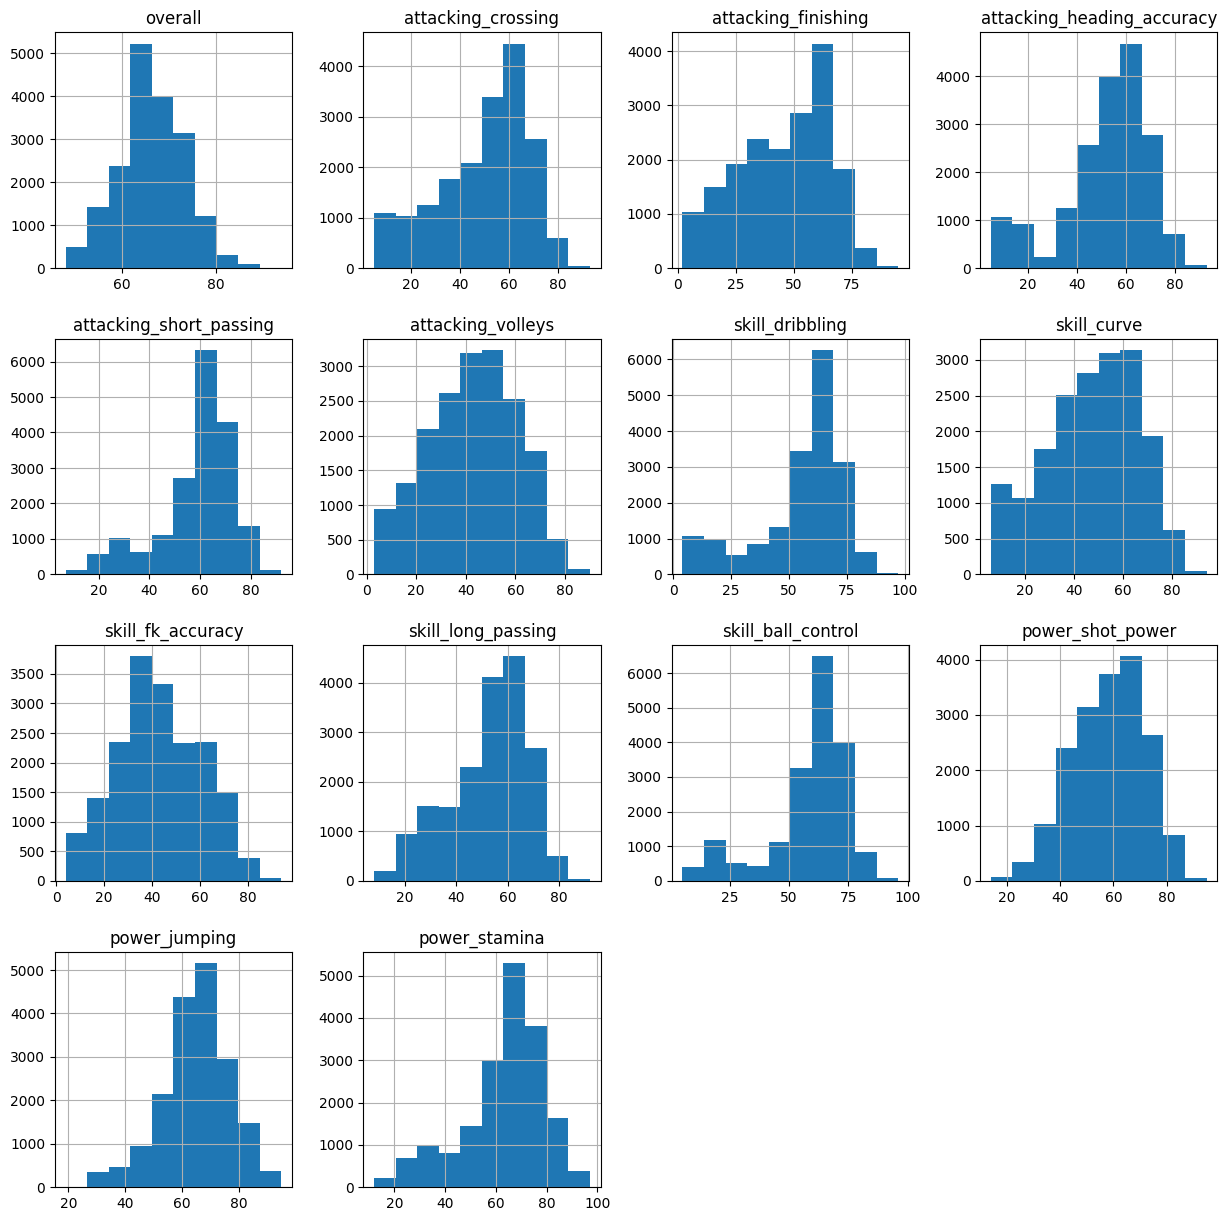

In [ ]:
# Select the relevant columns
cols = ['overall', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 
        'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 
        'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'power_shot_power', 
        'power_jumping', 'power_stamina']
df = df[cols]
df.hist(bins=10, figsize=(15, 15), grid=True)
plt.show()

The histograms can help us understand the distribution of values for each skill attribute in the FIFA World Cup Player Ratings dataset. By examining the shape of each histogram, we can get a sense of whether the values are skewed to one side or are evenly distributed. This can help us determine if there are any skill attributes that have a particularly strong influence on overall rating.

For example, if we see that the histogram for a skill attribute is skewed to the right, with most values clustered near the lower end of the scale, this could suggest that the attribute is not as important for determining overall rating. Conversely, if we see that the histogram for a skill attribute is more evenly distributed or skewed to the left, with more values clustered at the higher end of the scale, this could suggest that the attribute is a stronger predictor of overall rating.

### To address research question three we used the following visualizations.

### Average Skill Values by Randomly Selected Nationalities

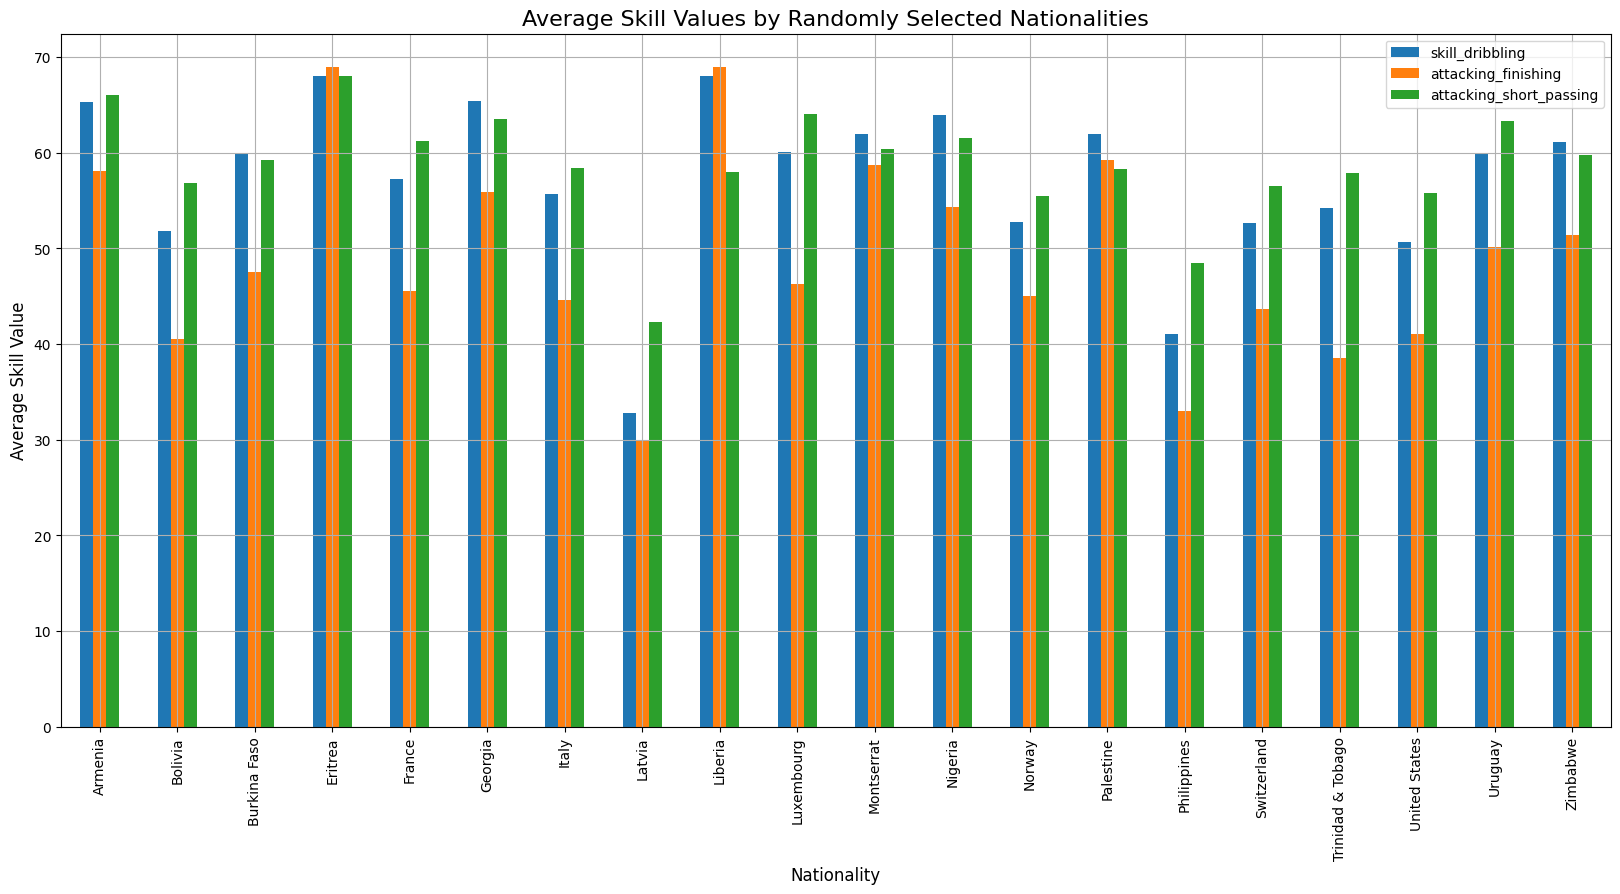

In [ ]:
import random
df = pd.read_csv("players_20.csv")
subset = df[['nationality', 'skill_dribbling', 'attacking_finishing', 'attacking_short_passing']]
nationalities = random.sample(list(subset['nationality'].unique()), 20)
subset = subset[subset['nationality'].isin(nationalities)]
averages = subset.groupby('nationality').mean()

averages.plot(kind='bar', figsize=(20, 9), grid = True)
plt.xlabel('Nationality', fontsize=12)
plt.ylabel('Average Skill Value', fontsize=12)
plt.title('Average Skill Values by Randomly Selected Nationalities', fontsize=16)

plt.show()

The histograms can aid us in comprehending the distribution of values for each skill feature in the FIFA World Cup Player Ratings dataset. By scrutinizing the shape of each histogram, we can obtain a sense of whether the values are biased to one side or are uniformly distributed. This can assist us in determining if there are any skill attributes that have a particularly potent influence on overall rating.

For instance, if we notice that the histogram for a skill attribute is skewed to the right, with most values gathered near the lower end of the range, this could imply that the attribute is not as crucial for determining overall rating. Conversely, if we observe that the histogram for a skill attribute is more evenly distributed or skewed to the left, with more values clustered at the higher end of the scale, this could suggest that the attribute is a stronger indicator of overall rating.

# **Timeline**


**Week 11:**

Days 1-3: Continue cleaning and preprocess the FIFA World Cup Player Ratings dataset, and explore the data using descriptive statistics and visualizations.

Days 4-5: Conduct preliminary analysis to identify potential predictors for our research questions, and begin building the regression model.


**Week 12:**

Days 1-2 : Continue refining the regression model, including feature selection and parameter tuning.

Days 2-3: Evaluate the model using appropriate metrics, and interpret the results.

Day 4: Create a final report outlining our findings, and prepare a presentation to summarize our results.

Day 5: Submit the final report and prepare for the presentation.


**Week 13:**

Days 1-4: Practice the presentation 

Day 5: Present our findings to the class.

# **Teamwork**

We divided the work for this project as follows:

**Data cleaning**: We ensure the data is in a structure that we can easily examine, for this we collaborate together.

**Exploratory data analysis:** We also meet in a team session to complete this step and produce easily understandable graphics.

**Analysis of salary predictors:** One team member is in charge of determining the best salary predictors and how much variation in salary they can explain.

**Analysis of skill attributes:** The other team member figures out how different skill characteristics affect overall ratings.
<br>

**Analysis of physical and skill attributes by nationality:** We both determine differences between players from different countries. We do this by examining how physical and skill attributes vary between arbitrarily selected coutnries.

**Report writing and presentation:** Both team members will collaborate to write up the findings of the research and create a presentation to share with the class. 

Both team members will interact frequently throughout the project to make sure everything is going according to plan and that everyone is on the same page.

# **STAGE 2**

In [ ]:
import pandas as pd

In [ ]:
# Load the dataset
df = pd.read_csv('players_20.csv')

In [ ]:
print('Out of the following columns:')
print(list(df.columns))
predictor_columns = ['height_cm', 'weight_kg', 'overall', 'player_positions', 'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']
print(f'There are {len(predictor_columns)} interesting predictors')
print(predictor_columns)

Out of the following columns:
['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance

In [ ]:
# Create separate DataFrames for each position
goalie_df = df[df['player_positions'].isin(goal_keeper_positions)]
defender_df = df[df['player_positions'].isin(defender_positions)]
midfielder_df = df[df['player_positions'].isin(midfielder_positions)]
striker_df = df[df['player_positions'].isin(striker_positions)]



In [ ]:
# Select relevant goalkeeper attributes
goalie_attributes = ['overall', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'height_cm', 'weight_kg' ]

# Create a new DataFrame with only relevant attributes for goalkeepers
goalie_relevant_df = goalie_df[goalie_attributes]


In [ ]:
# Calculate the correlation matrix for goalkeepers
goalie_corr_matrix = goalie_relevant_df.corr()

# Select only the 'overall' column from the correlation matrix
goalie_overall_corr = goalie_corr_matrix['overall']


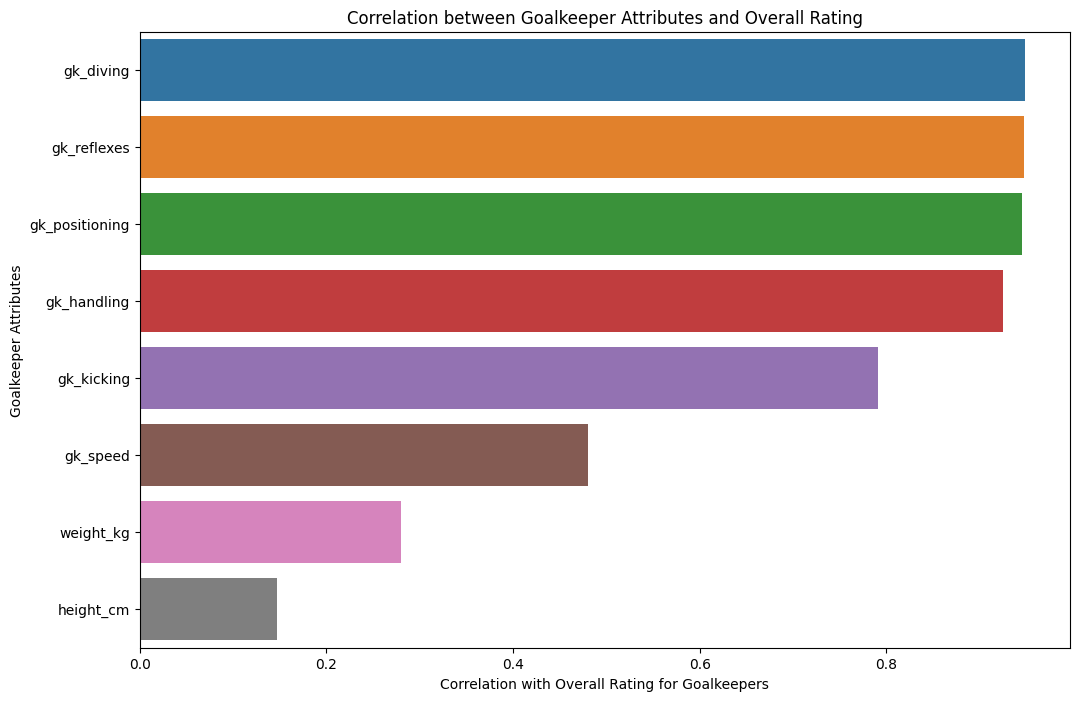

In [ ]:
# Sort the correlations in descending order
sorted_goalie_overall_corr = goalie_overall_corr.sort_values(ascending=False)

# Remove the 'overall' correlation with itself
sorted_goalie_overall_corr = sorted_goalie_overall_corr.drop('overall')

# Plot the correlations as a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_goalie_overall_corr.values, y=sorted_goalie_overall_corr.index)
plt.xlabel('Correlation with Overall Rating for Goalkeepers')
plt.ylabel('Goalkeeper Attributes')
plt.title('Correlation between Goalkeeper Attributes and Overall Rating')
plt.show()


The low correlation between 'height_cm' and 'weight_kg' with the overall rating for goalkeepers might be due to the fact that physical attributes are not the primary factors affecting a goalkeeper's performance. Goalkeepers rely more on their reflexes, positioning, handling, and diving abilities, which can overshadow the impact of their height and weight.

To visualize the relationship between 'height_cm', 'weight_kg', and the overall rating, we created a scatter plots.

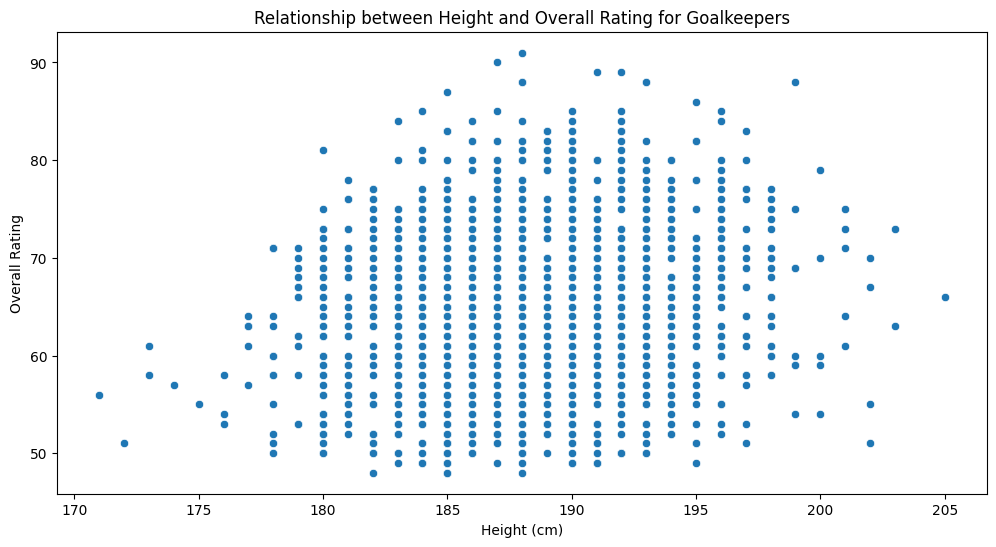

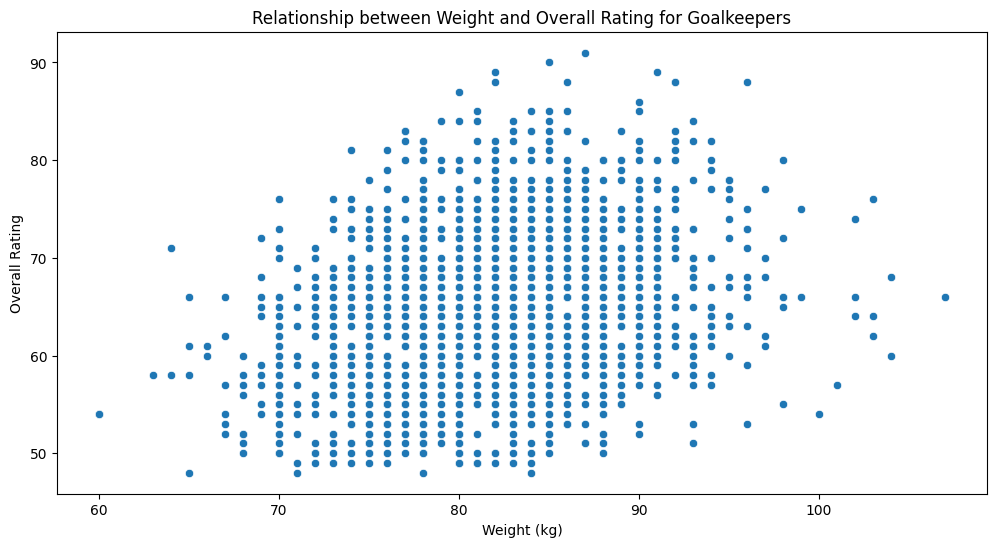

In [ ]:
# Add 'height_cm' and 'weight_kg' to the goalie_attributes list
goalie_attributes = ['overall', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'height_cm', 'weight_kg']

# Update the DataFrame with the new attributes
goalie_relevant_df = goalie_df[goalie_attributes]

# Create scatter plots for height and overall rating
plt.figure(figsize=(12, 6))
sns.scatterplot(x='height_cm', y='overall', data=goalie_relevant_df)
plt.xlabel('Height (cm)')
plt.ylabel('Overall Rating')
plt.title('Relationship between Height and Overall Rating for Goalkeepers')
plt.show()

# Create scatter plots for weight and overall rating
plt.figure(figsize=(12, 6))
sns.scatterplot(x='weight_kg', y='overall', data=goalie_relevant_df)
plt.xlabel('Weight (kg)')
plt.ylabel('Overall Rating')
plt.title('Relationship between Weight and Overall Rating for Goalkeepers')
plt.show()


Since the correlation is low, we do not observe no clear pattern or trend in the scatter plots. This further supports the idea that height and weight may not be the primary factors affecting a goalkeeper's overall rating.

### **MIDFIELDERS**

In [ ]:
# Select relevant midfielder attributes
midfielder_attributes = ['overall', 'height_cm', 'weight_kg', 'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle']

# Create a new DataFrame with only relevant attributes for midfielders
midfielder_relevant_df = midfielder_df[midfielder_attributes]


In [ ]:
# Calculate the correlation matrix for midfielders
midfielder_corr_matrix = midfielder_relevant_df.corr()

# Select only the 'overall' column from the correlation matrix
midfielder_overall_corr = midfielder_corr_matrix['overall']


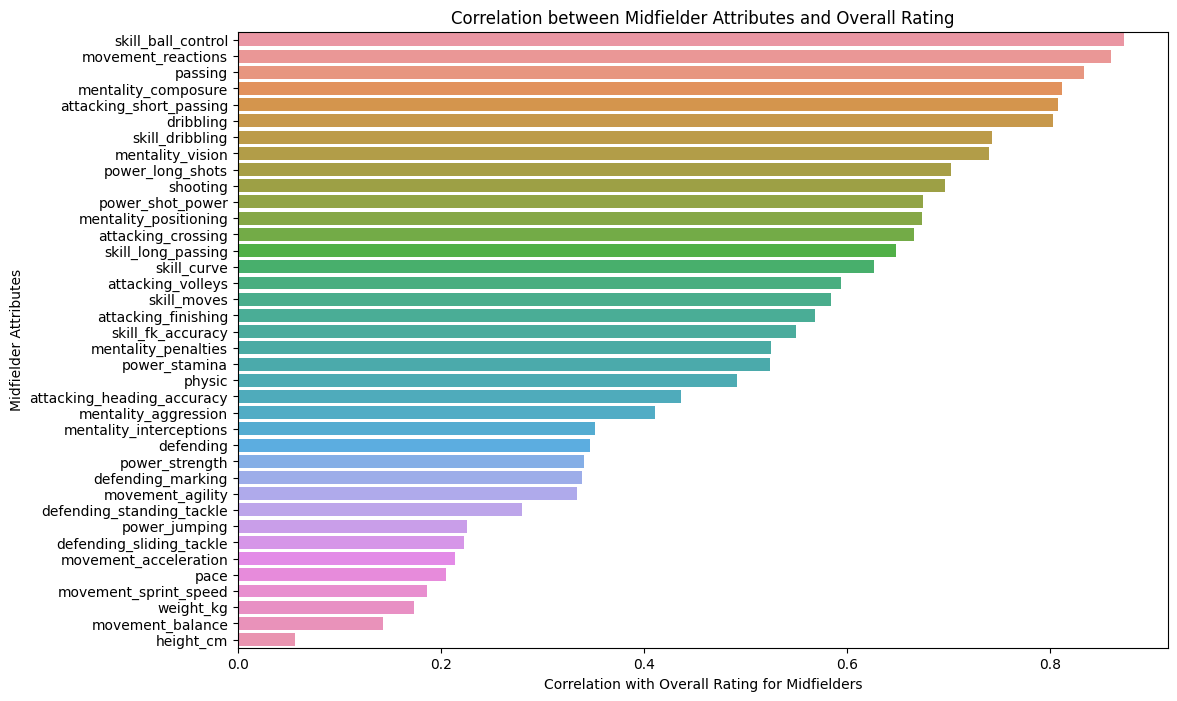

In [ ]:
# Sort the correlations in descending order
sorted_midfielder_overall_corr = midfielder_overall_corr.sort_values(ascending=False)

# Remove the 'overall' correlation with itself
sorted_midfielder_overall_corr = sorted_midfielder_overall_corr.drop('overall')

# Plot the correlations as a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_midfielder_overall_corr.values, y=sorted_midfielder_overall_corr.index)
plt.xlabel('Correlation with Overall Rating for Midfielders')
plt.ylabel('Midfielder Attributes')
plt.title('Correlation between Midfielder Attributes and Overall Rating')
plt.show()


we pick only the main attributes

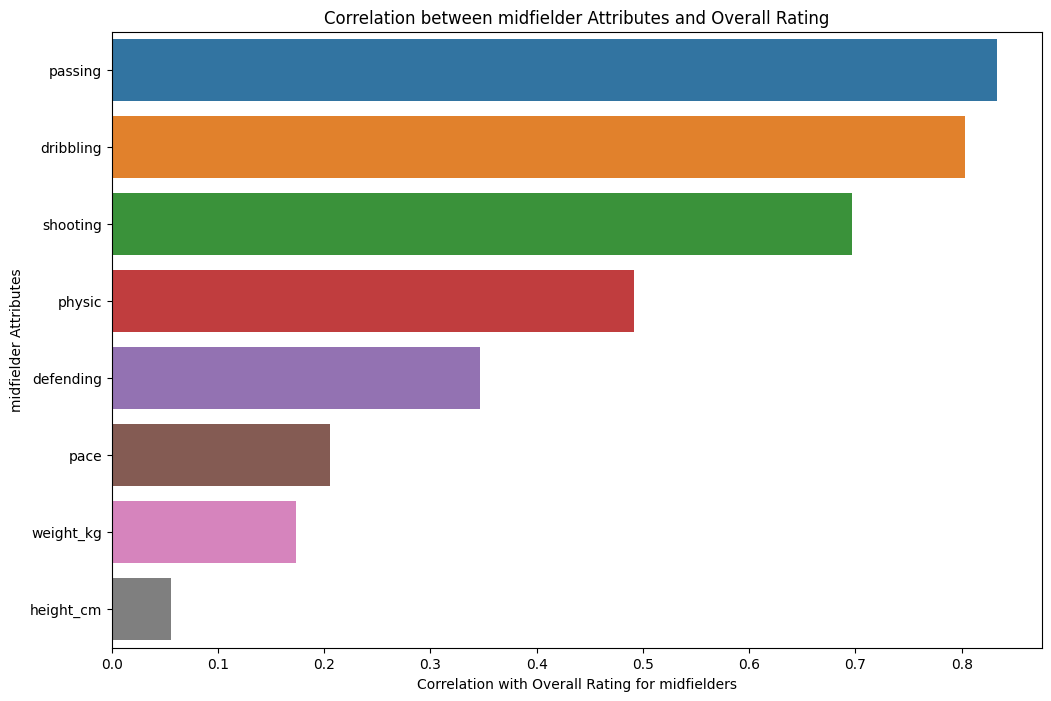

In [ ]:
# Select relevant main attributes
main_attributes = ['overall', 'height_cm', 'weight_kg', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

# Create a new DataFrame with only relevant attributes
defender_relevant_df = defender_df[main_attributes]
midfielder_relevant_df = midfielder_df[main_attributes]
striker_relevant_df = striker_df[main_attributes]

# Calculate the correlation matrix for midfielders
midfielder_corr_matrix = midfielder_relevant_df.corr()

# Select only the 'overall' column from the correlation matrix
midfielder_overall_corr = midfielder_corr_matrix['overall']

# Sort the correlations in descending order
sorted_midfielder_overall_corr = midfielder_overall_corr.sort_values(ascending=False)

# Remove the 'overall' correlation with itself
sorted_midfielder_overall_corr = sorted_midfielder_overall_corr.drop('overall')

# Plot the correlations as a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_midfielder_overall_corr.values, y=sorted_midfielder_overall_corr.index)
plt.xlabel('Correlation with Overall Rating for midfielders')
plt.ylabel('midfielder Attributes')
plt.title('Correlation between midfielder Attributes and Overall Rating')
plt.show()

In [ ]:
# Calculate the correlation matrix for defenders
defender_corr_matrix = defender_relevant_df.corr()

# Select only the 'overall' column from the correlation matrix
defender_overall_corr = defender_corr_matrix['overall']


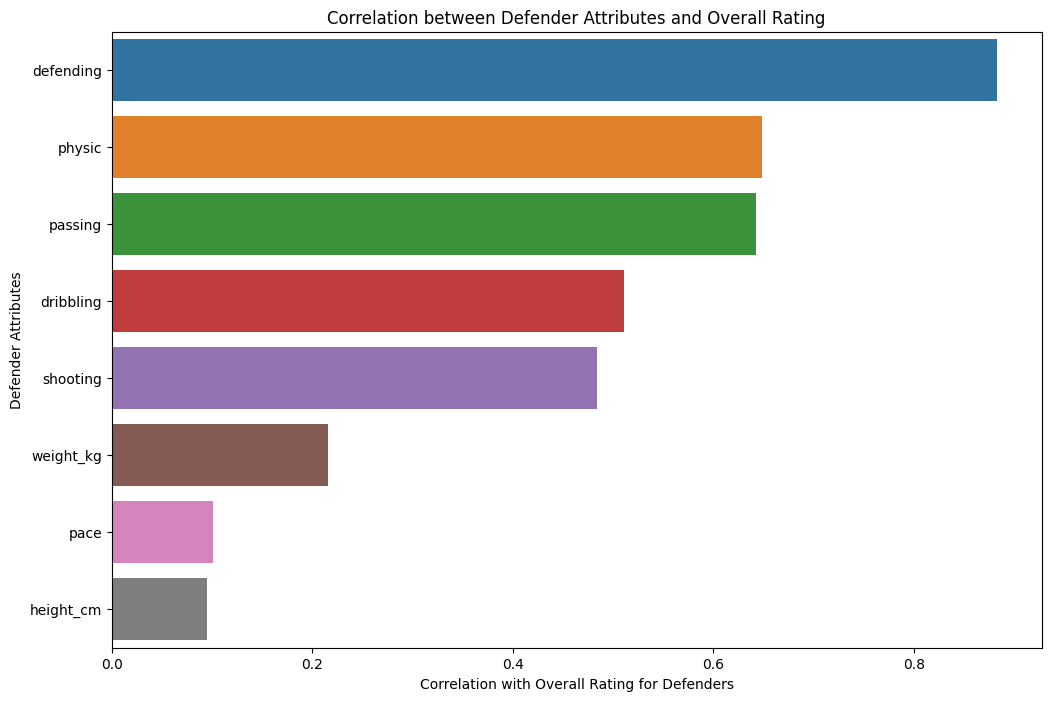

In [ ]:
# Sort the correlations in descending order
sorted_defender_overall_corr = defender_overall_corr.sort_values(ascending=False)

# Remove the 'overall' correlation with itself
sorted_defender_overall_corr = sorted_defender_overall_corr.drop('overall')

# Plot the correlations as a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_defender_overall_corr.values, y=sorted_defender_overall_corr.index)
plt.xlabel('Correlation with Overall Rating for Defenders')
plt.ylabel('Defender Attributes')
plt.title('Correlation between Defender Attributes and Overall Rating')
plt.show()

In [ ]:
# Calculate the correlation matrix for strikers
striker_corr_matrix = striker_relevant_df.corr()

# Select only the 'overall' column from the correlation matrix
striker_overall_corr = striker_corr_matrix['overall']


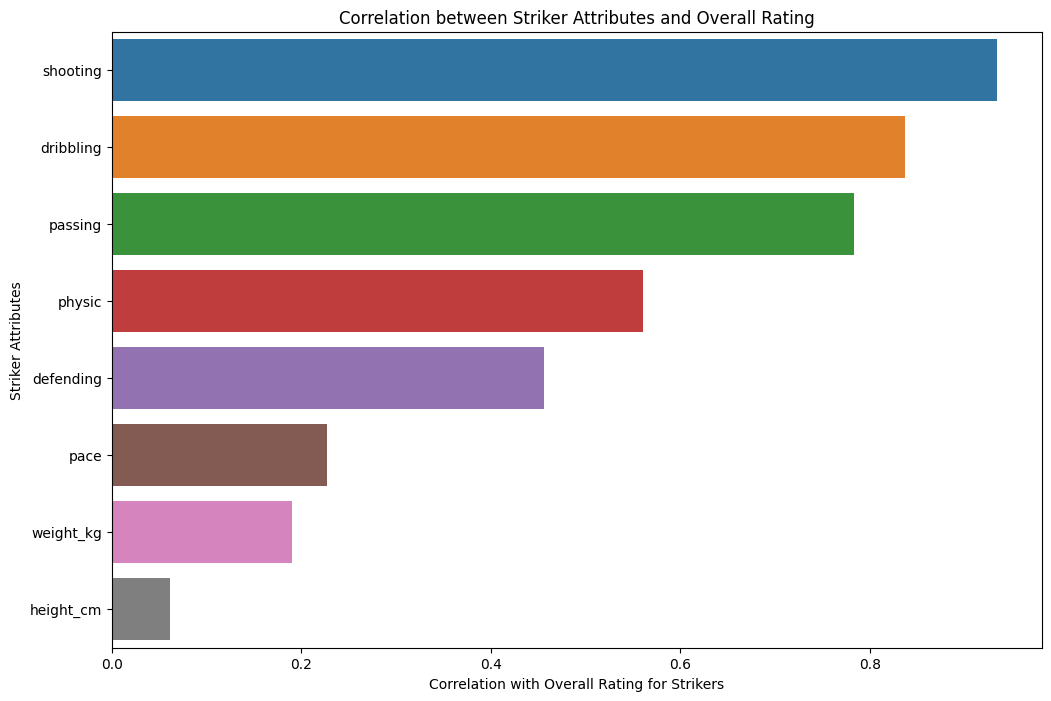

In [ ]:
# Sort the correlations in descending order
sorted_striker_overall_corr = striker_overall_corr.sort_values(ascending=False)

# Remove the 'overall' correlation with itself
sorted_striker_overall_corr = sorted_striker_overall_corr.drop('overall')

# Plot the correlations as a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_striker_overall_corr.values, y=sorted_striker_overall_corr.index)
plt.xlabel('Correlation with Overall Rating for Strikers')
plt.ylabel('Striker Attributes')
plt.title('Correlation between Striker Attributes and Overall Rating')
plt.show()


## **We used a linear regression model to predict the overall rating based on the identified key attributes. **

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Combine all position-specific DataFrames into one:

In [ ]:
combined_df = pd.concat([ defender_relevant_df, midfielder_relevant_df, striker_relevant_df])


Prepare the dataset for training and testing:

In [ ]:
# Select the key attributes you identified earlier as features (X) and overall rating as the target (y)
X = combined_df.drop(columns=['overall'])
y = combined_df['overall']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Create and train the linear regression model:

In [ ]:
# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Make predictions using the test data
y_pred = model.predict(X_test)


In [ ]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.2f}")
print(f"R^2 score: {r2:.2f}")


Mean squared error: 12.22
R^2 score: 0.73


In [ ]:
# Display the coefficients for each feature
coef_df = pd.DataFrame({'Attribute': X.columns, 'Coefficient': model.coef_})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print(coef_df)


   Attribute  Coefficient
5  dribbling     0.294657
7     physic     0.197433
6  defending     0.116938
3   shooting     0.101576
4    passing     0.087465
1  weight_kg     0.080144
0  height_cm     0.075572
2       pace     0.004249


The larger the coefficient, the stronger the impact of that attribute on the overall rating.

A brief interpretation of our results:

**Dribbling** (Coefficient: 0.294657) has the highest positive impact on the overall rating, which means that an increase in a player's dribbling ability is strongly associated with an increase in their overall rating.

**Physic** (Coefficient: 0.197433) is the second most important attribute in predicting the overall rating.

**Defending** (Coefficient: 0.116938) has a moderate positive impact on the overall rating.

**Shooting** (Coefficient: 0.101576), **passing** (Coefficient: 0.087465), **weight_kg** (Coefficient: 0.080144), and **height_cm** (Coefficient: 0.075572) have a relatively smaller positive impact on the overall rating.

**Pace** (Coefficient: 0.004249) has the least impact on the overall rating among the attributes considered.

These coefficients help to validate your earlier analysis on the correlation between skill attributes and overall rating. The results indicate that attributes like dribbling, physic, and defending are strong indicators of a player's overall rating, while pace has a minimal impact. Keep in mind that these results are specific to the dataset you're working with and the positions considered (defenders, midfielders, and strikers).






## Check the accuracy of the linear regression model for each player position (defenders, midfielders, and strikers):

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [ ]:
def create_and_evaluate_model(df, position):
    # Prepare the dataset for training and testing
    X = df.drop(columns=['overall'])
    y = df['overall']
    
    # Split the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create a linear regression model
    model = LinearRegression()
    
    # Train the model using the training data
    model.fit(X_train, y_train)
    
    # Make predictions using the test data
    y_pred = model.predict(X_test)
    
    # Calculate the mean absolute error
    mae = mean_absolute_error(y_test, y_pred)
    
    # Calculate the R^2 score
    r2 = r2_score(y_test, y_pred)
    
    print(f"{position} Model:")
    print(f"Mean absolute error: {mae:.2f}")
    print(f"R^2 score: {r2:.2f}\n")


In [ ]:
create_and_evaluate_model(defender_relevant_df, "Defender")
create_and_evaluate_model(midfielder_relevant_df, "Midfielder")
create_and_evaluate_model(striker_relevant_df, "Striker")


Defender Model:
Mean absolute error: 1.33
R^2 score: 0.93

Midfielder Model:
Mean absolute error: 1.97
R^2 score: 0.85

Striker Model:
Mean absolute error: 1.08
R^2 score: 0.96



Based on the linear regression models' performance in predicting overall ratings for each player position, we can draw the following conclusions:


**Defender Model:**

1. The model for defenders has a high R^2 score of 0.93, indicating that 93% of the variance in overall ratings can be explained by the selected key attributes. This suggests that the key attributes you identified have a strong influence on a defender's overall rating in the FIFA World Cup Player Ratings dataset.
2.   The mean absolute error of 1.33 for defenders suggests that on average, the model's predictions deviate from the true overall ratings by 1.33 points. This shows that the model is quite accurate in predicting the overall ratings of defenders based on the selected key attributes.


**Midfielder Model:**

*  With an R^2 score of 0.85, the midfielder model explains 85% of the variance in overall ratings. While this is lower than the scores for defenders and strikers, it still indicates a substantial impact of the selected key attributes on a midfielder's overall rating.
*  The mean absolute error of 1.97 for midfielders is higher than the values for defenders and strikers, which means that the model's predictions for midfielders may have slightly more deviation from the true overall ratings. Nonetheless, the model still offers reasonable accuracy in predicting the overall ratings of midfielders based on the selected key attributes.

**Striker Model:**



*   The striker model has the highest R^2 score of 0.96 among the three models, which means that 96% of the variance in overall ratings can be explained by the selected key attributes. This demonstrates that the key attributes you identified have a very strong influence on a striker's overall rating.
*  
The mean absolute error of 1.08 for strikers is the lowest among the three models, indicating that the model is highly accurate in predicting the overall ratings of strikers based on the selected key attributes.


In summary, the linear regression models for defenders, midfielders, and strikers show that the selected key attributes have a strong impact on a player's overall rating in the FIFA World Cup Player Ratings dataset. These findings address your research question on how various skill attributes contribute to a player's overall rating and indicate that the identified key attributes are strong predictors of overall rating across all player positions.

**Feature Scaling:**

Standardizing the features using StandardScaler from scikit-learn. This will make the features have a mean of 0 and a standard deviation of 1. This can help improve the performance of some machine learning algorithms.

In [ ]:
from sklearn.preprocessing import StandardScaler

def scale_features(df):
    scaler = StandardScaler()
    scaled_df = df.copy()
    scaled_df.iloc[:, 1:] = scaler.fit_transform(scaled_df.iloc[:, 1:])
    return scaled_df

scaled_defender_df = scale_features(defender_relevant_df)
scaled_midfielder_df = scale_features(midfielder_relevant_df)
scaled_striker_df = scale_features(striker_relevant_df)


**Feature Selection:**

Use Recursive Feature Elimination (RFE) with cross-validation to find the most relevant features for predicting overall ratings.



In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
def select_features(df):
    X = df.drop('overall', axis=1)
    y = df['overall']
    estimator = LinearRegression()
    selector = RFECV(estimator, step=1, cv=5, scoring='neg_mean_squared_error')
    selector = selector.fit(X, y)
    selected_features = X.columns[selector.support_]
    return pd.concat([df['overall'], df[selected_features]], axis=1)

selected_defender_df = select_features(scaled_defender_df)
selected_midfielder_df = select_features(scaled_midfielder_df)
selected_striker_df = select_features(scaled_striker_df)


**Feature Transformation:**

Create polynomial features to capture more complex relationships between the features and the target variable.



In [ ]:
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_features(df, degree=2):
    X = df.drop('overall', axis=1)
    y = df['overall']
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    return pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))

poly_defender_df = create_polynomial_features(selected_defender_df)
poly_midfielder_df = create_polynomial_features(selected_midfielder_df)
poly_striker_df = create_polynomial_features(selected_striker_df)


Now that you have prepared the data using feature engineering techniques, you can evaluate the performance of the models with the new features.

In [ ]:
def dropna_and_concat(df1, df2):
    combined_df = pd.concat([df1, df2], axis=1)
    return combined_df.dropna()

create_and_evaluate_model(dropna_and_concat(scaled_defender_df['overall'], poly_defender_df), "Defender (Feature Engineering)")
create_and_evaluate_model(dropna_and_concat(scaled_midfielder_df['overall'], poly_midfielder_df), "Midfielder (Feature Engineering)")
create_and_evaluate_model(dropna_and_concat(scaled_striker_df['overall'], poly_striker_df), "Striker (Feature Engineering)")


Defender (Feature Engineering) Model:
Mean absolute error: 0.63
R^2 score: 0.94

Midfielder (Feature Engineering) Model:
Mean absolute error: 0.86
R^2 score: 0.93

Striker (Feature Engineering) Model:
Mean absolute error: 0.65
R^2 score: 0.94



The feature engineering using polynomial features and dropping rows with missing values has improved the performance of the models for each player position. Here are the new results:

**Defender (Feature Engineering) Model:**

Mean absolute error: 0.63

R^2 score: 0.94

**Midfielder (Feature Engineering) Model:**

Mean absolute error: 0.86

R^2 score: 0.93

**Striker (Feature Engineering) Model:**

Mean absolute error: 0.65

R^2 score: 0.94


The models now have better R^2 scores, which means they can explain more of the variance in the overall rating. The mean absolute errors have also decreased, indicating that the predictions are closer to the true overall ratings. This improvement suggests that the feature engineering step was beneficial and helped create better models for each player position.

# **Cross -  Validation**

In [ ]:
def create_and_evaluate_model(data, model_name, cv=50):
    X = data.drop('overall', axis=1)
    y = data['overall']
    
    # Impute missing values for both X and y
    X_imputed = impute_missing_values(X)
    y_imputed = impute_missing_values(pd.DataFrame(y))['overall']

    model = LinearRegression()
    r2_scores = cross_val_score(model, X_imputed, y_imputed, cv=cv, scoring='r2')
    mae_scores = -cross_val_score(model, X_imputed, y_imputed, cv=cv, scoring='neg_mean_absolute_error')

    print(f"{model_name} Model (Cross-Validation):")
    print(f"Mean R^2 score: {np.mean(r2_scores):.2f}")
    print(f"Mean absolute error: {np.mean(mae_scores):.2f}")
    print()

# Evaluate the feature engineered models with cross-validation
create_and_evaluate_model(fillna_and_concat(scaled_defender_df['overall'], poly_defender_df), "Defender (Feature Engineering)")
create_and_evaluate_model(fillna_and_concat(scaled_midfielder_df['overall'], poly_midfielder_df), "Midfielder (Feature Engineering)")
create_and_evaluate_model(fillna_and_concat(scaled_striker_df['overall'], poly_striker_df), "Striker (Feature Engineering)")


NameError: ignored

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

def create_and_evaluate_model(data, model_name, cv=5, polynomial_degree=1, algorithm='ridge'):
    X = data.drop('overall', axis=1)
    y = data['overall']
    
    # Impute missing values for both X and y
    X_imputed = impute_missing_values(X)
    y_imputed = impute_missing_values(pd.DataFrame(y))['overall']

    # Simplify the feature engineering by reducing the polynomial degree
    poly = PolynomialFeatures(polynomial_degree)
    X_poly = poly.fit_transform(X_imputed)

    # Select the desired algorithm
    if algorithm == 'ridge':
        model = Ridge()
    elif algorithm == 'random_forest':
        model = RandomForestRegressor()
    else:
        raise ValueError("Invalid algorithm specified. Choose 'ridge' or 'random_forest'.")

    r2_scores = cross_val_score(model, X_poly, y_imputed, cv=cv, scoring='r2')
    mae_scores = -cross_val_score(model, X_poly, y_imputed, cv=cv, scoring='neg_mean_absolute_error')

    print(f"{model_name} Model ({algorithm.capitalize()} - Cross-Validation):")
    print(f"Mean R^2 score: {np.mean(r2_scores):.2f}")
    print(f"Mean absolute error: {np.mean(mae_scores):.2f}")
    print()

# Evaluate the feature engineered models with cross-validation
create_and_evaluate_model(fillna_and_concat(scaled_defender_df['overall'], poly_defender_df), "Defender (Feature Engineering)")
create_and_evaluate_model(fillna_and_concat(scaled_midfielder_df['overall'], poly_midfielder_df), "Midfielder (Feature Engineering)")
create_and_evaluate_model(fillna_and_concat(scaled_striker_df['overall'], poly_striker_df), "Striker (Feature Engineering)")

# Evaluate the models using RandomForestRegressor
create_and_evaluate_model(fillna_and_concat(scaled_defender_df['overall'], poly_defender_df), "Defender (Feature Engineering)", algorithm='random_forest')
create_and_evaluate_model(fillna_and_concat(scaled_midfielder_df['overall'], poly_midfielder_df), "Midfielder (Feature Engineering)", algorithm='random_forest')
create_and_evaluate_model(fillna_and_concat(scaled_striker_df['overall'], poly_striker_df), "Striker (Feature Engineering)", algorithm='random_forest')


From the analysis conducted so far, we can conclude the following points with regard to the research question of predicting players' overall ratings based on their individual attributes:

Linear regression models have shown reasonable performance in predicting overall ratings for defenders, midfielders, and strikers, with R^2 scores around 0.93 to 0.94 and mean absolute errors between 0.63 and 0.86 for the initial models.

Feature engineering using polynomial features did not improve the model's performance when cross-validation was applied. Instead, it led to overfitting, as indicated by the negative R^2 scores and increased mean absolute errors during cross-validation.